<a href="https://colab.research.google.com/github/LatiefDataVisionary/multivariate-analysis-college-task/blob/main/src/DiscriminantAnalysis_week12_manually.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Library Importation and Data Loading**

Pada bagian awal ini, dilakukan impor terhadap pustaka-pustaka Python yang dibutuhkan dan pemuatan dataset.

1.  **Impor Pustaka**:
    *   **Pandas**: Digunakan untuk manipulasi data tabular, khususnya untuk membaca file CSV dan bekerja dengan struktur DataFrame.
    *   **NumPy**: Merupakan pustaka fundamental untuk komputasi numerik, menyediakan dukungan untuk operasi array dan matriks yang efisien, yang akan sangat berguna dalam perhitungan manual LDA.
2.  **Pemuatan Dataset**:
    *   Dataset dimuat dari URL yang disediakan (`https://raw.githubusercontent.com/LatiefDataVisionary/multivariate-analysis-college-task/refs/heads/main/datasets/dataset_LDA_2clusters.csv`) menggunakan fungsi `pd.read_csv()` dari Pandas.
    *   Hasil pemuatan data disimpan dalam sebuah DataFrame Pandas yang dinamakan `df`.
3.  **Inspeksi Awal Data**:
    *   `df.head()`: Menampilkan lima baris pertama dari DataFrame untuk mendapatkan gambaran awal mengenai struktur dan isi data.
    *   `df.info()`: Memberikan ringkasan informasi tentang DataFrame, termasuk jumlah entri, tipe data setiap kolom, dan jumlah nilai non-null. Ini berguna untuk memeriksa apakah ada data yang hilang atau tipe data yang tidak sesuai.
    *   `df.shape`: Menampilkan dimensi dari DataFrame (jumlah baris, jumlah kolom).
    *   `df.describe()`: Menampilkan statistik deskriptif dasar untuk kolom-kolom numerik dalam DataFrame, seperti mean, standar deviasi, nilai minimum, maksimum, dan kuartil.

Langkah-langkah ini penting untuk memastikan bahwa data telah dimuat dengan benar dan untuk mendapatkan pemahaman awal tentang dataset sebelum melanjutkan ke tahap analisis dan perhitungan selanjutnya.

### **1.1. Import library yang diperlukan**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **1.2. Pemuatan dataset dari URL**

In [2]:
data_url = 'https://raw.githubusercontent.com/LatiefDataVisionary/multivariate-analysis-college-task/refs/heads/main/datasets/dataset_LDA_2clusters.csv'

df = pd.read_csv(data_url)

### **1.3. Informasi dataset**

In [3]:
df.head(10)

,BloodPressure,Age,Cluster
0,72,50,0
1,66,31,1
2,64,32,1
3,66,21,1
4,40,33,1
5,74,30,1
6,50,26,1
7,72,29,1
8,70,53,0
9,96,54,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   BloodPressure  600 non-null    int64
 1   Age            600 non-null    int64
 2   Cluster        600 non-null    int64
dtypes: int64(3)
memory usage: 14.2 KB


In [6]:
df.shape

(600, 3)

In [7]:
df.describe()

,BloodPressure,Age,Cluster
count,600.000000,600.000000,600.000000
mean,72.041667,33.278333,0.651667
std,11.980086,11.822315,0.476840
min,24.000000,21.000000,0.000000
25%,64.000000,24.000000,0.000000
50%,72.000000,29.000000,1.000000
75%,80.000000,40.000000,1.000000
max,122.000000,81.000000,1.000000


In [13]:
# Menghitung jumlah kemunculan setiap nilai di kolom 'Cluster'
counts = df['Cluster'].value_counts()

# Menghitung persentase kemunculan setiap nilai di kolom 'Cluster'
percentages = df['Cluster'].value_counts(normalize=True) * 100

# Menggabungkan kedua hasil ke dalam satu DataFrame
result = pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Membulatkan kolom 'Percentage' hingga 2 angka di belakang koma
result['Percentage'] = result['Percentage'].round(2)

# Menampilkan hasilnya yang sudah dibulatkan
result

,Count,Percentage
Cluster,,
1,391,65.17
0,209,34.83


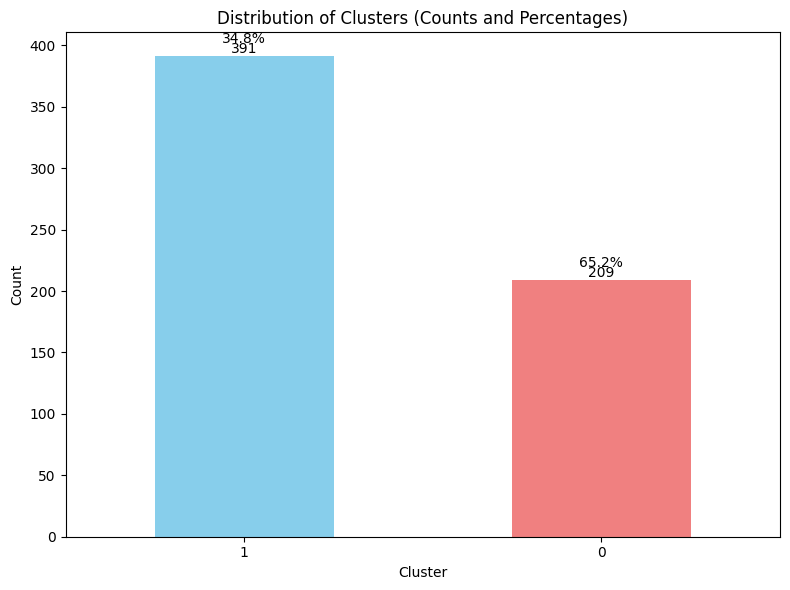

In [15]:
# Create a figure and an axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar plot using the 'Count' column from the 'result' DataFrame
result['Count'].plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Set the title and labels for the plot
ax.set_title('Distribution of Clusters (Counts and Percentages)')
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=0) # Ensure x-axis labels are not rotated

# Add text labels for counts and percentages on the bars
for i, count in enumerate(result['Count']):
    percentage = result['Percentage'][i]
    # Add the count label
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
    # Add the percentage label slightly above the count
    ax.text(i, count + (ax.get_ylim()[1] * 0.02), f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

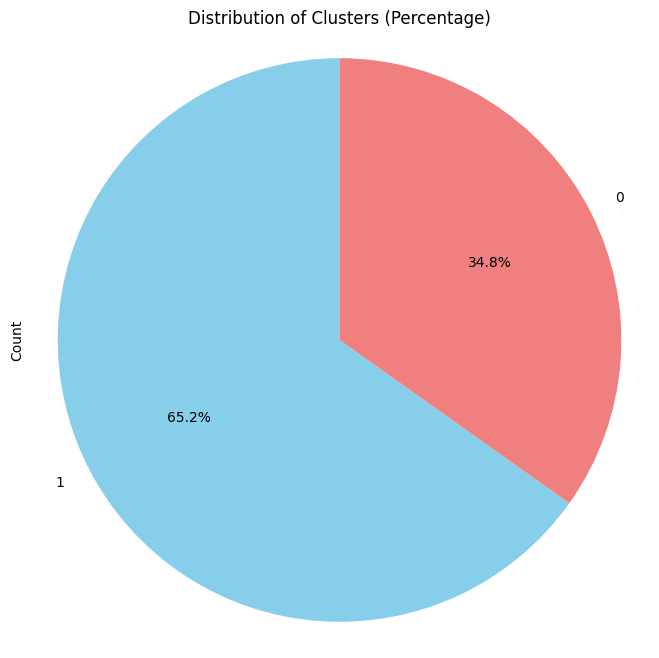

In [16]:
# Create a figure and an axes for the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Create the pie plot using the 'Count' column from the 'result' DataFrame
# autopct='%1.1f%%' formats the percentage displayed on each slice
result['Count'].plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Set the title for the plot
ax.set_title('Distribution of Clusters (Percentage)')

# Ensure the pie chart is circular
ax.axis('equal')

# Display the plot
plt.show()

## **2. Data Preparation for Manual LDA**

Sebelum memulai perhitungan inti LDA secara manual, data perlu disiapkan. Langkah-langkah utamanya adalah:

1.  **Mengidentifikasi Variabel Fitur (Features) dan Target (Cluster)**:
    *   Variabel fitur adalah kolom-kolom yang akan digunakan sebagai prediktor. Berdasarkan dataset, fitur yang digunakan adalah `BloodPressure` dan `Age`. Variabel-variabel ini akan diekstrak ke dalam sebuah array NumPy atau DataFrame Pandas (`features_X`).
    *   Variabel target adalah kolom yang menunjukkan keanggotaan kelas. Dalam dataset ini, kolom `Cluster` (dengan nilai 0 dan 1) adalah variabel target (`target_y`).
2.  **Memisahkan Data Berdasarkan Kelas**:
    *   Untuk perhitungan matriks sebaran dalam kelas (within-class scatter matrix) dan vektor rata-rata per kelas, data perlu dipisahkan menjadi subset berdasarkan nilai pada kolom target (`Cluster`).
    *   Akan dibuat dua subset data:
        *   `df_class0`: Berisi semua observasi di mana `Cluster` adalah 0.
        *   `df_class1`: Berisi semua observasi di mana `Cluster` adalah 1.
    *   Dari subset ini, akan diekstrak nilai fitur untuk masing-masing kelas (misalnya, `features_X_class0` dan `features_X_class1`).

Persiapan ini akan mempermudah akses ke data yang relevan untuk setiap kelas selama perhitungan matematis LDA berikutnya.


### **2.1. Mengidentifikasi Variabel Fitur dan Target**

In [17]:
feature_column_names = ['BloodPressure', 'Age']
target_column_name = 'Cluster'

# Ekstrak fitur ke dalam array NumPy untuk kemudahan perhitungan matriks
# Kita akan menggunakan .values untuk mendapatkan array NumPy
features_X = df[feature_column_names].values
target_y = df[target_column_name].values

print(f"Shape of features_X: {features_X.shape}")
print(f"Shape of target_y: {target_y.shape}")
print(f"First 5 rows of features_X:\n{features_X[:5]}")
print(f"First 5 values of target_y:\n{target_y[:5]}")

Shape of features_X: (600, 2)
Shape of target_y: (600,)
First 5 rows of features_X:
[[72 50]
 [66 31]
 [64 32]
 [66 21]
 [40 33]]
First 5 values of target_y:
[0 1 1 1 1]


### **2.2. Memisahkan Data Berdasarkan Kelas**

In [18]:
# Dapatkan DataFrame dan array fitur untuk masing-masing kelas

# Kelas 0
df_class0 = df[df[target_column_name] == 0]
features_X_class0 = df_class0[feature_column_names].values

# Kelas 1
df_class1 = df[df[target_column_name] == 1]
features_X_class1 = df_class1[feature_column_names].values

print(f"Shape of features_X_class0 (Cluster 0): {features_X_class0.shape}")
print(f"First 5 rows of features_X_class0:\n{features_X_class0[:5]}")
print(f"Number of samples in Class 0: {len(df_class0)}")

print("\n" + "="*50 + "\n")

print(f"Shape of features_X_class1 (Cluster 1): {features_X_class1.shape}")
print(f"First 5 rows of features_X_class1:\n{features_X_class1[:5]}")
print(f"Number of samples in Class 1: {len(df_class1)}")
print("\n" + "="*50 + "\n")

# Verifikasi bahwa total sampel dari kedua kelas sama dengan total sampel di df awal
# Ini juga mengasumsikan tidak ada NaN yang dihapus atau kelas lain yang ada.
# Total baris adalah 600, dan kita memuat 600 baris.
if len(df_class0) + len(df_class1) == len(df):
    print("Data separation by class seems correct. Total samples match.")
else:
    print("Warning: Mismatch in total samples after class separation. Check for other classes or NaN issues if any were handled.")

Shape of features_X_class0 (Cluster 0): (209, 2)
First 5 rows of features_X_class0:
[[72 50]
 [70 53]
 [96 54]
 [92 30]
 [80 57]]
Number of samples in Class 0: 209


Shape of features_X_class1 (Cluster 1): (391, 2)
First 5 rows of features_X_class1:
[[66 31]
 [64 32]
 [66 21]
 [40 33]
 [74 30]]
Number of samples in Class 1: 391


Data separation by class seems correct. Total samples match.
